In [1]:
%matplotlib inline

In [2]:
import datetime
import numpy
import pandas

In [3]:
df = pandas.read_csv("uproot-pip-2018-09-05.csv",
                     parse_dates=[0],
                     infer_datetime_format=True)
df.columns, len(df)

(Index(['timestamp', 'country_code', 'file_version', 'details_distro_name',
        'details_distro_version', 'details_system_name',
        'details_system_release', 'details_cpu'],
       dtype='object'), 3324)

In [4]:
uniqueness = df[["country_code", "details_distro_name", "details_distro_version",
                 "details_system_name", "details_system_release"]].apply(
    lambda x: ",".join(str(y) for y in x), axis=1)
df["uniqueness"] = uniqueness
df.drop_duplicates(["uniqueness"], inplace=True)
len(df)

551

In [5]:
df

,timestamp,country_code,file_version,details_distro_name,details_distro_version,details_system_name,details_system_release,details_cpu,uniqueness
0,2017-09-14 01:26:29,FR,1.0.1,NaN,NaN,Linux,3.16.0-4-amd64,NaN,"FR,nan,nan,Linux,3.16.0-4-amd64"
1,2017-09-29 13:00:22,DE,1.3.1,Scientific,6.9,Linux,2.6.32-696.10.3.el6.x86_64,x86_64,"DE,Scientific,6.9,Linux,2.6.32-696.10.3.el6.x8..."
2,2017-09-22 16:01:00,US,1.3.1,NaN,NaN,Linux,4.2.0-42-generic,NaN,"US,nan,nan,Linux,4.2.0-42-generic"
3,2017-10-19 08:02:04,IT,1.6.1,Fedora,26,Linux,4.13.5-200.fc26.x86_64,x86_64,"IT,Fedora,26,Linux,4.13.5-200.fc26.x86_64"
6,2017-09-18 20:30:48,FR,1.2.1,NaN,NaN,Linux,3.16.0-0.bpo.4-amd64,NaN,"FR,nan,nan,Linux,3.16.0-0.bpo.4-amd64"
7,2017-09-24 10:01:28,US,1.3.1,NaN,NaN,Linux,3.18.31-perf-g7273625,armv7l,"US,nan,nan,Linux,3.18.31-perf-g7273625"
8,2017-10-03 12:59:22,GB,1.3.1,Scientific Linux CERN SLC,6.9,Linux,4.4.0-93-generic,x86_64,"GB,Scientific Linux CERN SLC,6.9,Linux,4.4.0-9..."
10,2017-11-11 08:13:12,US,1.6.2,Arch Linux,NaN,Linux,4.13.11-1-ARCH,x86_64,"US,Arch Linux,nan,Linux,4.13.11-1-ARCH"
11,2017-09-25 20:46:50,US,1.3.1,macOS,10.13,Darwin,17.0.0,x86_64,"US,macOS,10.13,Darwin,17.0.0"
12,2017-09-26 10:41:18,GB,1.3.1,macOS,10.11.6,Darwin,15.6.0,x86_64,"GB,macOS,10.11.6,Darwin,15.6.0"


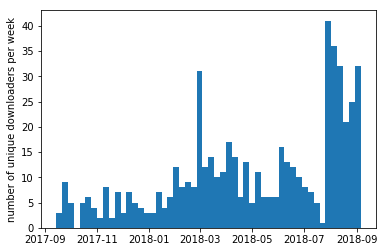

In [6]:
fig = df["timestamp"].hist(bins=365 // 7, grid=False)
fig.set_ylabel("number of unique downloaders per week")
fig.get_figure().savefig("uproot-pip-vsweek.pdf")

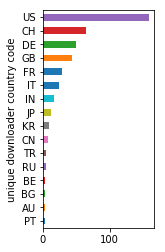

In [7]:
df2 = df.groupby("country_code").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 3].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("unique downloader country code")
fig.get_figure().savefig("uproot-pip-vscountry.pdf")

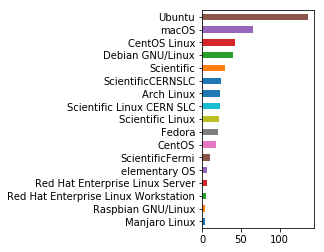

In [8]:
df2 = df.groupby("details_distro_name").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 3].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsos.pdf")

In [9]:
df["distro-country"] = df[["details_distro_name", "country_code"]].apply(
    lambda x: "{} ({})".format(x[0], x[1]), axis=1)

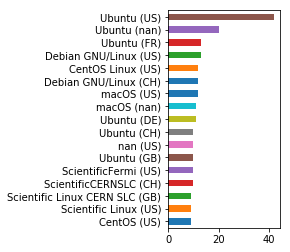

In [16]:
df2 = df.groupby("distro-country").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 8].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsoscountry.pdf")

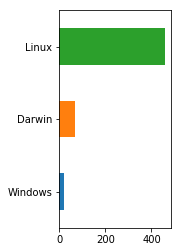

In [17]:
df2 = df.groupby("details_system_name").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 3].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsosbasic.pdf")

In [18]:
df = pandas.read_csv("uproot-pip-2018-09-05.csv",
                     parse_dates=[0],
                     infer_datetime_format=True)
uniqueness = df[["country_code", "details_distro_name", "details_distro_version",
                 "details_system_name", "details_system_release"]].apply(
    lambda x: ",".join(str(y) for y in x), axis=1)
df["uniqueness"] = uniqueness

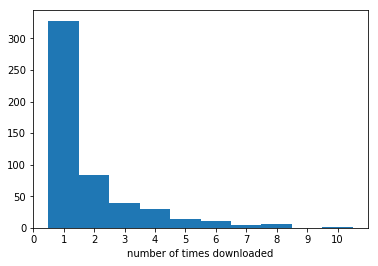

In [19]:
df2 = df.groupby("uniqueness").count().sort_values("timestamp", ascending=False)
fig = df2["timestamp"].hist(bins=numpy.linspace(0.5, 10.5, 11), grid=False)
fig.set_xlabel("number of times downloaded")
fig.set_xticks(range(10 + 1))
fig.get_figure().savefig("uproot-pip-numdownloads.pdf")